# Hi-kod Veri Bilimi Atölyesi Bitirme Projesi


##### 1. Verinin Hazırlanması (Data Preperation) & Veri Analizi (Data Analysis) ve Veri Görselleştirmesi (Data Visualization)

Bir e-ticaret şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.

Veri Seti Hikayesi

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının
01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.

Değişkenler

InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. C ile başlıyorsa iptal edilen işlem.
StockCode: Ürün kodu. Her bir ürün için eşsiz numara.
Description: Ürün ismi
Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
InvoiceDate: Fatura tarihi ve zamanı.
UnitPrice: Ürün fiyatı (Sterlin cinsinden)
CustomerID: Eşsiz müşteri numarası
Country: Ülke ismi. Müşterinin yaşadığı ülke.

In [2]:
# Gerekli kütüphanelerin kurulumu #
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from openpyxl.drawing.image import Image
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_ =  pd.read_excel("C:/Users/caspe/OneDrive/Masaüstü/online_retail_II-.xlsx", engine="openpyxl")
df_.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom


In [4]:
df = df_.copy()
data = df_.copy()

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom


In [6]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.9500,17530.0000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.7500,17530.0000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.7500,17530.0000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.7500,17530.0000,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.9500,17530.0000,United Kingdom


In [7]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [8]:
df.shape

(525461, 8)

In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.0000,525461,525461.0000,417534.0000
mean,10.3377,2010-06-28 11:37:36.845017856,4.6888,15360.6455
min,-9600.0000,2009-12-01 07:45:00,-53594.3600,12346.0000
25%,1.0000,2010-03-21 12:20:00,1.2500,13983.0000
50%,3.0000,2010-07-06 09:51:00,2.1000,15311.0000
75%,10.0000,2010-10-15 12:45:00,4.2100,16799.0000
max,19152.0000,2010-12-09 20:01:00,25111.0900,18287.0000
std,107.4241,NaN,146.1269,1680.8113


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0000,10.3377,-9600.0000,1.0000,3.0000,10.0000,19152.0000,107.4241
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0000,4.6888,-53594.3600,1.2500,2.1000,4.2100,25111.0900,146.1269
Customer ID,417534.0000,15360.6455,12346.0000,13983.0000,15311.0000,16799.0000,18287.0000,1680.8113


DataFrame İçinde Eksik Değer Kontrolü

In [11]:
df.isna().any()

Invoice        False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
Price          False
Customer ID     True
Country        False
dtype: bool

DataFrame'deki Boş Değer Sayımı

In [12]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Customer ID'ye Sahip Olmayan Satırların Temizlenmesi

In [13]:
data.dropna(subset=['Customer ID'],inplace=True)

In [14]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [15]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.0000,417534,417534.0000,417534.0000
mean,12.7588,2010-07-01 01:12:19.787609856,3.8875,15360.6455
min,-9360.0000,2009-12-01 07:45:00,0.0000,12346.0000
25%,2.0000,2010-03-26 11:26:00,1.2500,13983.0000
50%,4.0000,2010-07-08 19:12:00,1.9500,15311.0000
75%,12.0000,2010-10-14 14:08:00,3.7500,16799.0000
max,19152.0000,2010-12-09 20:01:00,25111.0900,18287.0000
std,101.2204,NaN,71.1318,1680.8113


İade/İptal işlemlerin (C harfi ile başlayan "Invoice" değerleri iade/iptal olduğunu belirtir) filtrelenmesi.

In [16]:
data[data['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.9500,16321.0000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.6500,16321.0000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.2500,16321.0000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.1000,16321.0000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.9500,16321.0000,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.1000,12605.0000,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.5000,15329.0000,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.9500,15329.0000,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.7500,15329.0000,United Kingdom


In [17]:
data = data[data['Invoice'].apply(lambda x: isinstance(x, str) and 'C' not in x)]


Fiyat sütunundaki değerlerin filtrelenmesi

In [18]:


# Excel dosyasını okuma
file_path = "C:/Users/caspe/OneDrive/Masaüstü/online_retail_II-.xlsx " # Excel dosyasının yolunu belirtin
df = pd.read_excel(file_path)

# Filtreleme işlemi
filtered_data = df[df['Price'] <= 0].sort_values('Price')

# Sonucu gösterme
print(filtered_data)

        Invoice StockCode      Description  Quantity         InvoiceDate       Price  Customer ID         Country
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00 -53594.3600          NaN  United Kingdom
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00 -44031.7900          NaN  United Kingdom
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00 -38925.8700          NaN  United Kingdom
263      489464     21733     85123a mixed       -96 2009-12-01 10:52:00      0.0000          NaN  United Kingdom
280027   516681     22086              NaN       -89 2010-07-22 11:37:00      0.0000          NaN  United Kingdom
...         ...       ...              ...       ...                 ...         ...          ...             ...
122606   501116     20689              NaN        39 2010-03-12 14:06:00      0.0000          NaN  United Kingdom
123835   501162     20989              NaN         1 2010-03-15 09:32:00      0.0000    

In [19]:
df = pd.read_excel(file_path)

# Filtreleme işlemi
filtered_data = df[df['Price'] > 0]

# İlk 5 satırı görüntüleme
print(filtered_data.head())

  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00 6.9500   13085.0000  United Kingdom
1  489434    79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00 6.7500   13085.0000  United Kingdom
2  489434    79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00 6.7500   13085.0000  United Kingdom
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00 2.1000   13085.0000  United Kingdom
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00 1.2500   13085.0000  United Kingdom


In [20]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.0000,525461,525461.0000,417534.0000
mean,10.3377,2010-06-28 11:37:36.845017856,4.6888,15360.6455
min,-9600.0000,2009-12-01 07:45:00,-53594.3600,12346.0000
25%,1.0000,2010-03-21 12:20:00,1.2500,13983.0000
50%,3.0000,2010-07-06 09:51:00,2.1000,15311.0000
75%,10.0000,2010-10-15 12:45:00,4.2100,16799.0000
max,19152.0000,2010-12-09 20:01:00,25111.0900,18287.0000
std,107.4241,NaN,146.1269,1680.8113


Toplam Satılan Ürün Sayısı

In [21]:
df['Quantity'].sum()
data_1 = df.groupby('Description')['Quantity'].sum().reset_index()

En çok satılan 10 ürünün listelenmesi, görselleştirilmesi

In [22]:
data_1 = df.groupby('Description')['Quantity'].sum().reset_index()
data_1 = data_1.rename(columns={'Description': 'Product_name', 'Quantity': 'Total_Quantity'})
data_1 = data_1.sort_values(by='Total_Quantity', ascending=False).head(10)
data_1

,Product_name,Total_Quantity
4402,WHITE HANGING HEART T-LIGHT HOLDER,57733
4509,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
721,BROCADE RING PURSE,47647
2744,PACK OF 72 RETRO SPOT CAKE CASES,46106
279,ASSORTED COLOUR BIRD ORNAMENT,44925
147,60 TEATIME FAIRY CAKE CASES,36326
2742,PACK OF 60 PINK PAISLEY CAKE CASES,31822
2158,JUMBO BAG RED RETROSPOT,30727
3984,SMALL POPCORN HOLDER,29500
4067,STRAWBERRY CERAMIC TRINKET BOX,26563


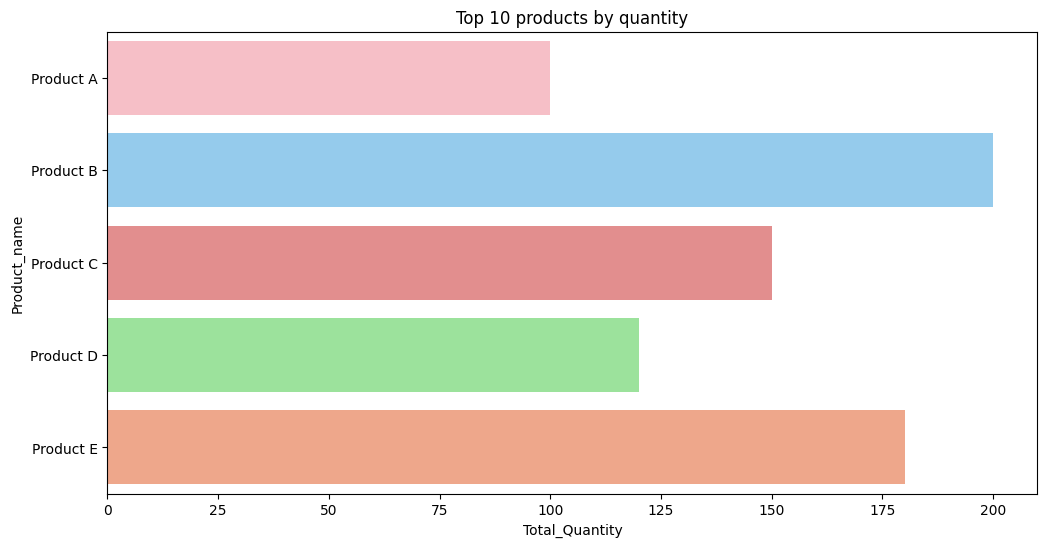

In [23]:
# Örnek veri çerçevesi (data_1'ı kullandığınızı varsayalım)
data_1 = pd.DataFrame({
    'Product_name': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Total_Quantity': [100, 200, 150, 120, 180]
})

# Renk paleti tanımlama
custom_palette = ["lightpink", "lightskyblue", "lightcoral", "lightgreen", "lightsalmon"]

# Çubuk grafiğini çizin
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Quantity', y='Product_name', data=data_1, palette=custom_palette)
plt.title('Top 10 products by quantity')

# Grafiği görüntüleme
plt.show()


En az satılan 10 ürün

In [24]:
data_2 = df.groupby('Description')['Quantity'].sum().reset_index()
data_2 = data_2.rename(columns={'Description': 'Product_name', 'Quantity': 'Total_Quantity'})
data_2 = data_2.sort_values(by='Total_Quantity', ascending=False).tail(10)
data_2

,Product_name,Total_Quantity
4610,damages,-3788
4647,my error - connor,-4200
4675,wet damages,-4354
1445,Ebay sales by the box.,-7100
1943,Given away,-8800
4590,Zebra invcing error,-9000
4625,ebay sales,-13630
4642,missing,-15149
4632,given away,-20000
157,?,-25373


In [25]:
df['Country'].nunique()

40

In [26]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

En çok alışveriş yapan 5 ülke

In [27]:

countries = df['Country'].value_counts()[:5]

# Her ülke ve karşılık gelen değeri yazdırma
for country, count in countries.items():
    print(f"Ülke: {country}, Toplam Sayı: {count}")

Ülke: United Kingdom, Toplam Sayı: 485852
Ülke: EIRE, Toplam Sayı: 9670
Ülke: Germany, Toplam Sayı: 8129
Ülke: France, Toplam Sayı: 5772
Ülke: Netherlands, Toplam Sayı: 2769


Ülke başına verilen sipariş sayısı

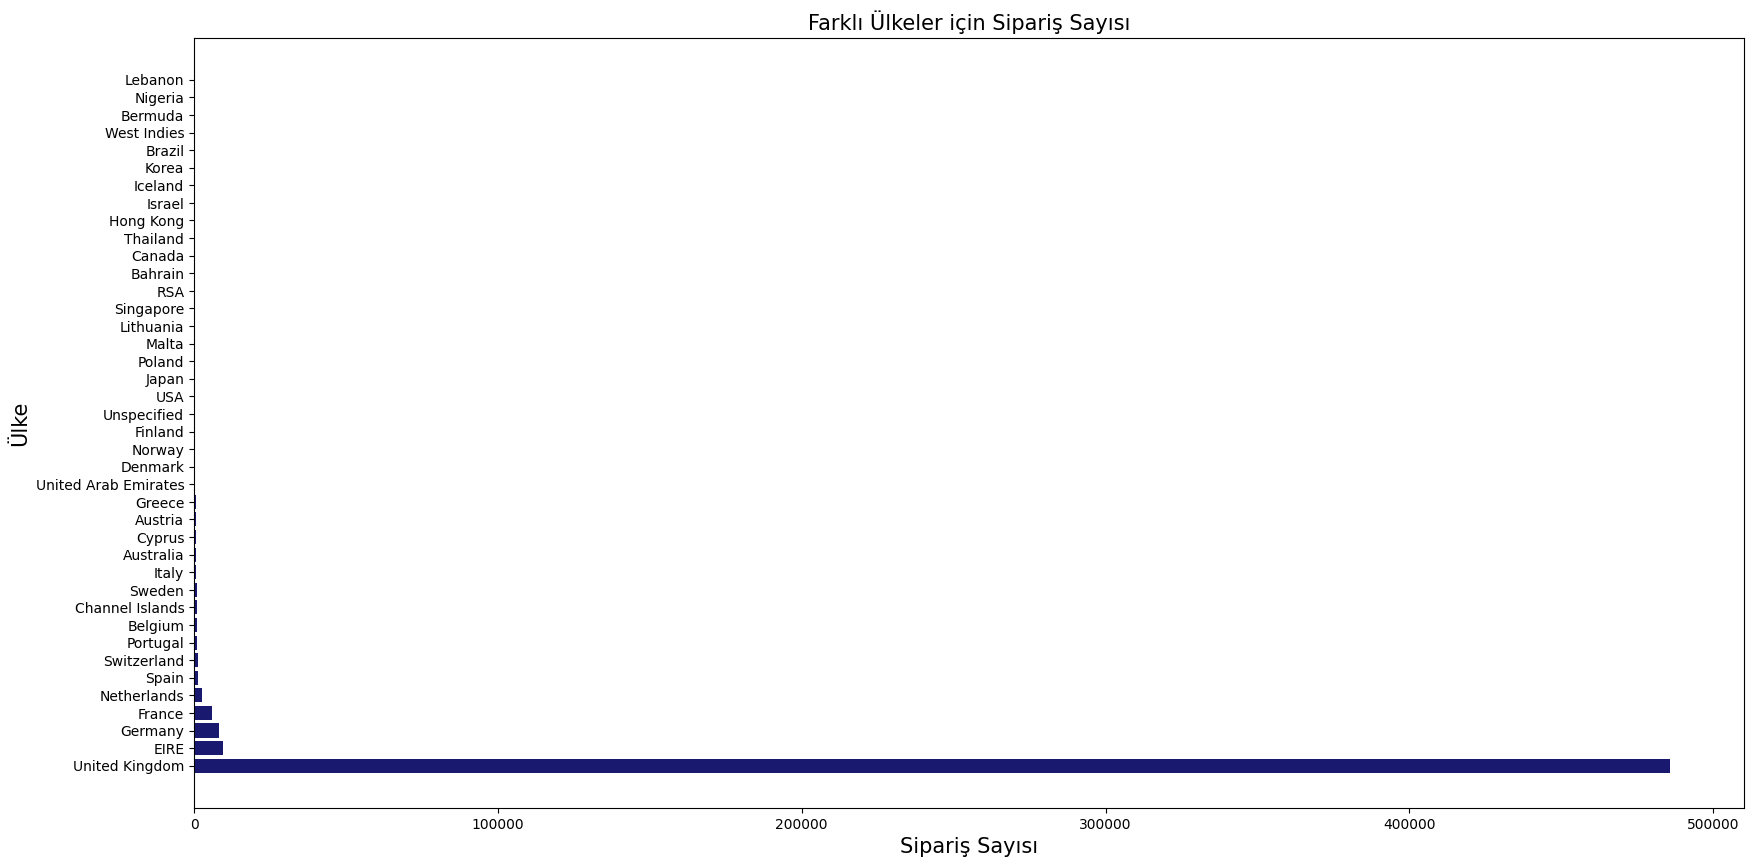

In [28]:

# Her ülkenin sipariş sayısını hesaplayın
group_country = df['Country'].value_counts()

# Sipariş sayısına göre sıralayın
group_country = group_country.sort_values(ascending=False)

# Grafik boyutunu ayarlayın
plt.figure(figsize=(20, 10))

# Yatay çubuk grafiği çizin
plt.barh(group_country.index, group_country.values, color='midnightblue')

# Eksen etiketlerini ve başlığı ekleyin
plt.xlabel('Sipariş Sayısı', fontsize=15)
plt.ylabel('Ülke', fontsize=15)
plt.title('Farklı Ülkeler için Sipariş Sayısı', fontsize=15)

# Grafiği gösterin
plt.show()

UK(Birleşik Krallık) dışındaki ülkelerin sipariş sayısı

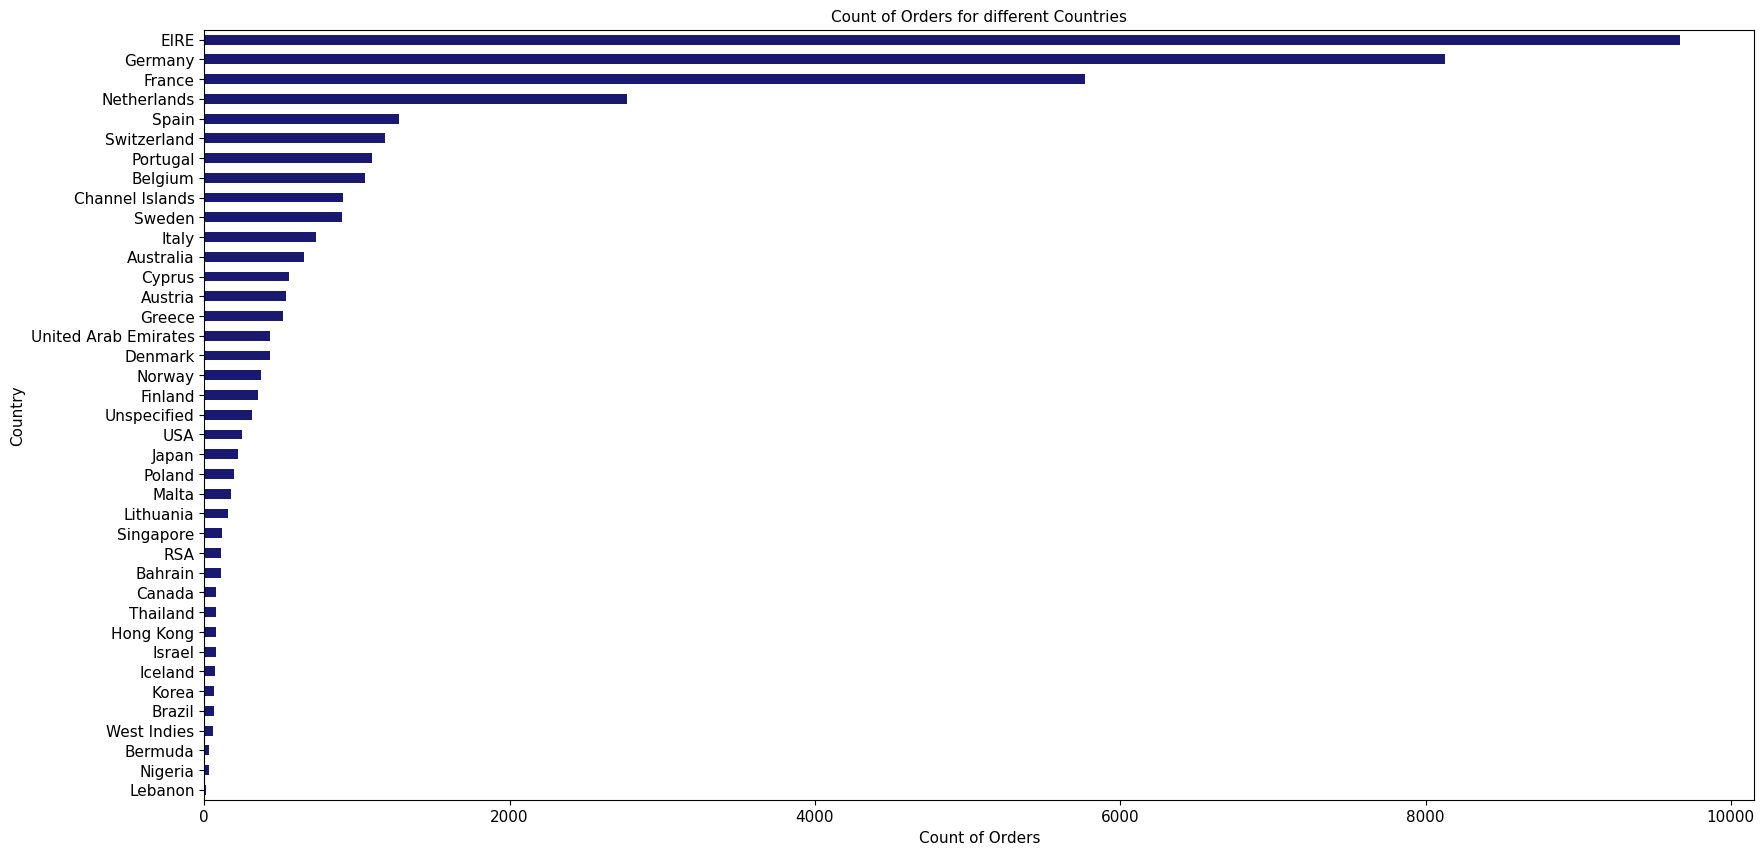

In [29]:
group_country = df.groupby('Country')['Invoice'].count().sort_values()
del group_country['United Kingdom']

plt.subplots(figsize=(20,10))
group_country.plot(kind = 'barh', fontsize=11,color='midnightblue')
plt.xlabel('Count of Orders', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Count of Orders for different Countries', fontsize=11)
plt.show()

En çok iade/iptal işleminde bulunan ülkeler

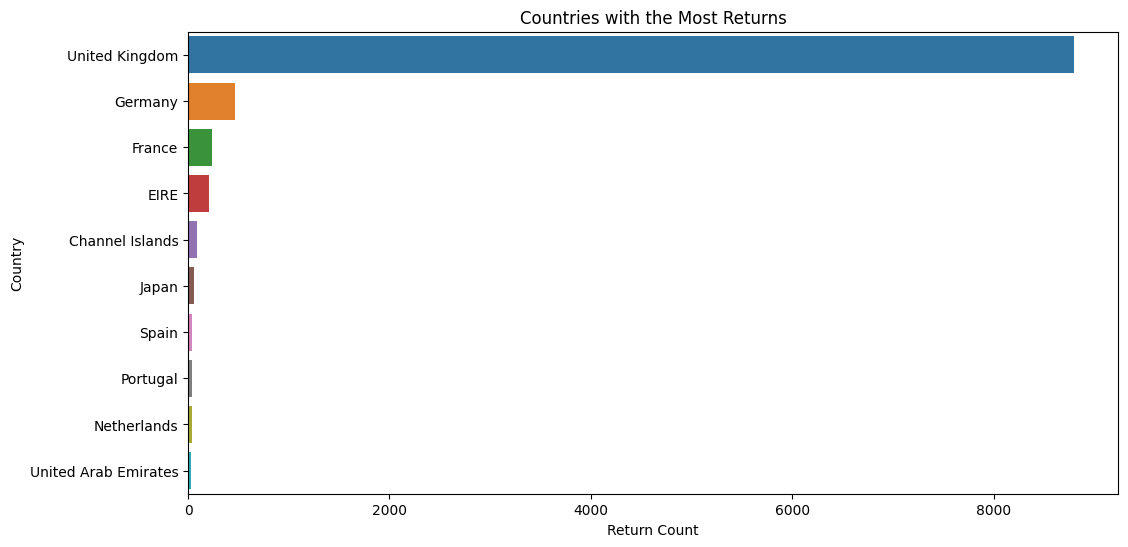

In [30]:
returned_orders = df_[df_['Invoice'].str.contains('C', na=False)]

returns_by_country = returned_orders.groupby('Country').size().reset_index(name='ReturnCount')

returns_by_country = returns_by_country.sort_values('ReturnCount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='ReturnCount', y='Country', data=returns_by_country.head(10))
plt.title('Countries with the Most Returns')
plt.xlabel('Return Count')
plt.ylabel('Country')
plt.show()

En çok iade edilen ürünler

In [31]:
returned_orders = df_[df_['Invoice'].str.contains('C', na=False)]

returns_by_product = returned_orders.groupby(['StockCode', 'Description']).size().reset_index(name='ReturnCount')

returns_by_product = returns_by_product.sort_values('ReturnCount', ascending=False)

returns_by_product = returns_by_product[returns_by_product['StockCode'] != ('M')]
returns_by_product = returns_by_product[returns_by_product['StockCode'] != ('POST')]
returns_by_product = returns_by_product[returns_by_product['StockCode'] != ('D')]
returns_by_product = returns_by_product[returns_by_product['StockCode'] != ('S')]
returns_by_product.reset_index(drop=True, inplace=True)

returns_by_product

,StockCode,Description,ReturnCount
0,22138,BAKING SET 9 PIECE RETROSPOT,184
1,22423,REGENCY CAKESTAND 3 TIER,166
2,21232,STRAWBERRY CERAMIC TRINKET BOX,129
3,79323W,WHITE CHERRY LIGHTS,120
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,93
...,...,...,...
2241,21154,RED SPOTTY OVEN GLOVE,1
2242,22340,NOEL GARLAND PAINTED ZINC,1
2243,84006,MAGIC TREE -PAPER FLOWERS,1
2244,21154,RED RETROSPOT OVEN GLOVE,1


En çok iade edilen 10 ürün

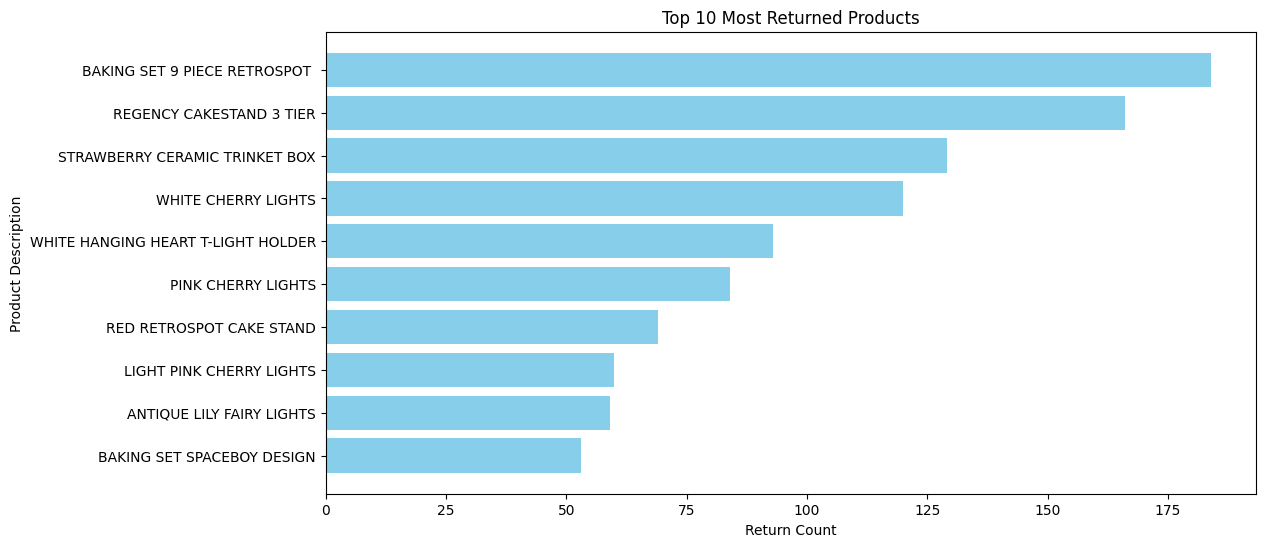

In [32]:
top_10_returns = returns_by_product.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_returns['Description'], top_10_returns['ReturnCount'], color='skyblue')
plt.xlabel('Return Count')
plt.ylabel('Product Description')
plt.title('Top 10 Most Returned Products')
plt.gca().invert_yaxis()
plt.show()


Birleşik Krallık müşterilerinden haftalık, aylık ve üç aylık olarak elde edilen kârları görselleştirilmesi

In [33]:
uk_customers = df[df['Country'] == 'United Kingdom']
uk_customers.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom


In [34]:
uk_customers['InvoiceDate'] = pd.to_datetime(uk_customers['InvoiceDate'])

uk_customers['Week'] = uk_customers['InvoiceDate'].dt.isocalendar().week
uk_customers['Month'] = uk_customers['InvoiceDate'].dt.month
uk_customers['Quarter'] = uk_customers['InvoiceDate'].dt.quarter
uk_customers.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Week,Month,Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom,49,12,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom,49,12,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom,49,12,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom,49,12,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom,49,12,4


In [35]:
uk_customers['Profit'] = uk_customers['Quantity'] * uk_customers['Price']

weekly_profits = uk_customers.groupby('Week')['Profit'].sum()
monthly_profits = uk_customers.groupby('Month')['Profit'].sum()
quarterly_profits = uk_customers.groupby('Quarter')['Profit'].sum()

weekly_profits.head()

Week
1   111722.7200
2   145834.3400
3   114100.1210
4   119451.5210
5   104109.7720
Name: Profit, dtype: float64

In [36]:
monthly_profits.head()


Month
1   491108.7020
2   444249.8360
3   676956.6710
4   497154.1910
5   520678.6900
Name: Profit, dtype: float64

In [37]:
quarterly_profits.head()

Quarter
1   1612315.2090
2   1599494.5110
3   1777555.1310
4   3205412.6820
Name: Profit, dtype: float64

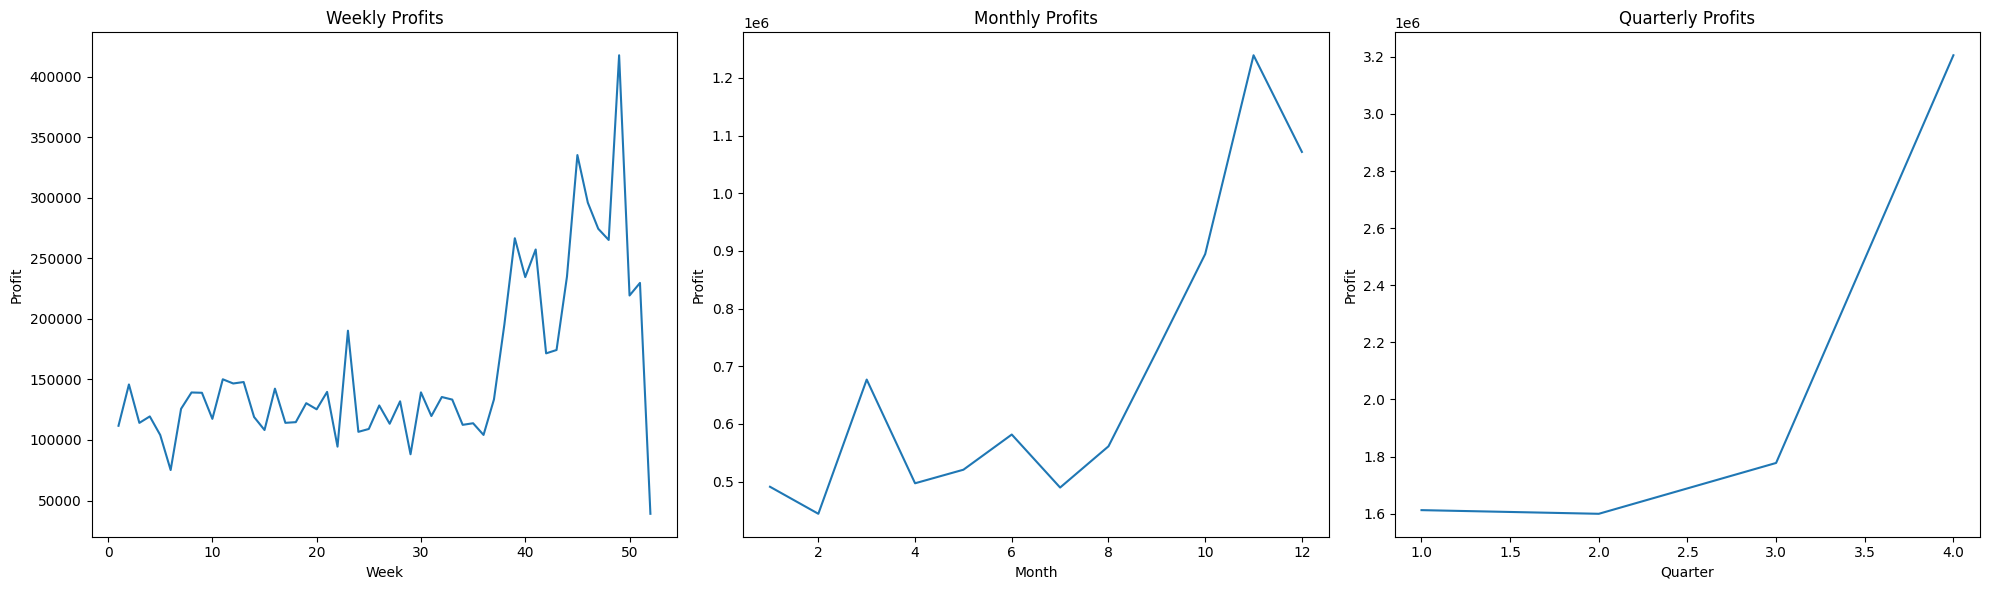

In [38]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(weekly_profits.index, weekly_profits.values)
plt.title('Weekly Profits')
plt.xlabel('Week')
plt.ylabel('Profit')

plt.subplot(1, 3, 2)
plt.plot(monthly_profits.index, monthly_profits.values)
plt.title('Monthly Profits')
plt.xlabel('Month')
plt.ylabel('Profit')

plt.subplot(1, 3, 3)
plt.plot(quarterly_profits.index, quarterly_profits.values)
plt.title('Quarterly Profits')
plt.xlabel('Quarter')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

Birleşik Krallık dışındaki müşterilerden haftalık, aylık ve üç aylık olarak elde edilen kârları görselleştirilmesi

In [39]:
non_uk_customers = df[df['Country'] != 'United Kingdom']
non_uk_customers.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.4500,12682.0000,France
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.9500,12682.0000,France
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.9500,12682.0000,France
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.5500,12682.0000,France
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.9500,12682.0000,France


In [40]:
non_uk_customers['InvoiceDate'] = pd.to_datetime(non_uk_customers['InvoiceDate'])

non_uk_customers['Week'] = non_uk_customers['InvoiceDate'].dt.isocalendar().week
non_uk_customers['Month'] = non_uk_customers['InvoiceDate'].dt.month
non_uk_customers['Quarter'] = non_uk_customers['InvoiceDate'].dt.quarter
non_uk_customers.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Week,Month,Quarter
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.4500,12682.0000,France,49,12,4
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.9500,12682.0000,France,49,12,4
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.9500,12682.0000,France,49,12,4
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.5500,12682.0000,France,49,12,4
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.9500,12682.0000,France,49,12,4


In [41]:
non_uk_customers['Profit'] = non_uk_customers['Quantity'] * non_uk_customers['Price']

non_uk_weekly_profits = non_uk_customers.groupby('Week')['Profit'].sum()
non_uk_monthly_profits = non_uk_customers.groupby('Month')['Profit'].sum()
non_uk_quarterly_profits = non_uk_customers.groupby('Quarter')['Profit'].sum()

non_uk_weekly_profits.head()

Week
1   54670.8700
2   11156.5700
3   34677.4200
4   32419.3300
5   17751.5700
Name: Profit, dtype: float64

In [42]:
non_uk_monthly_profits.head()

Month
1   132924.1900
2    88841.5900
3    88892.0900
4    93426.2410
5    94644.1400
Name: Profit, dtype: float64

In [43]:
non_uk_quarterly_profits.head()


Quarter
1   310657.8700
2   286195.3610
3   308108.0000
4   439745.8700
Name: Profit, dtype: float64

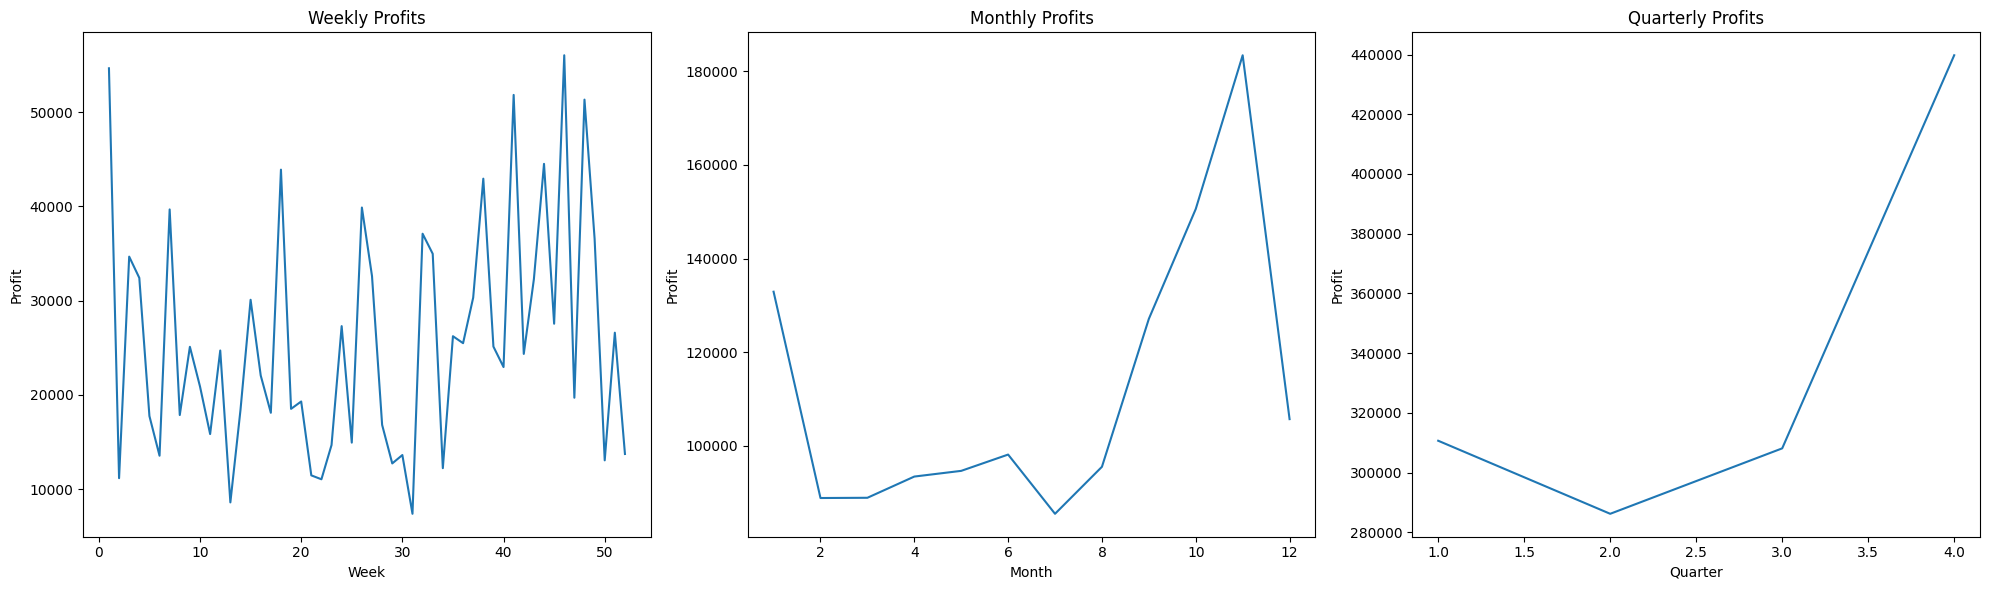

In [44]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(non_uk_weekly_profits.index, non_uk_weekly_profits.values)
plt.title('Weekly Profits')
plt.xlabel('Week')
plt.ylabel('Profit')

plt.subplot(1, 3, 2)
plt.plot(non_uk_monthly_profits.index, non_uk_monthly_profits.values)
plt.title('Monthly Profits')
plt.xlabel('Month')
plt.ylabel('Profit')

plt.subplot(1, 3, 3)
plt.plot(non_uk_quarterly_profits.index, non_uk_quarterly_profits.values)
plt.title('Quarterly Profits')
plt.xlabel('Quarter')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

Ülke başına harcanan para


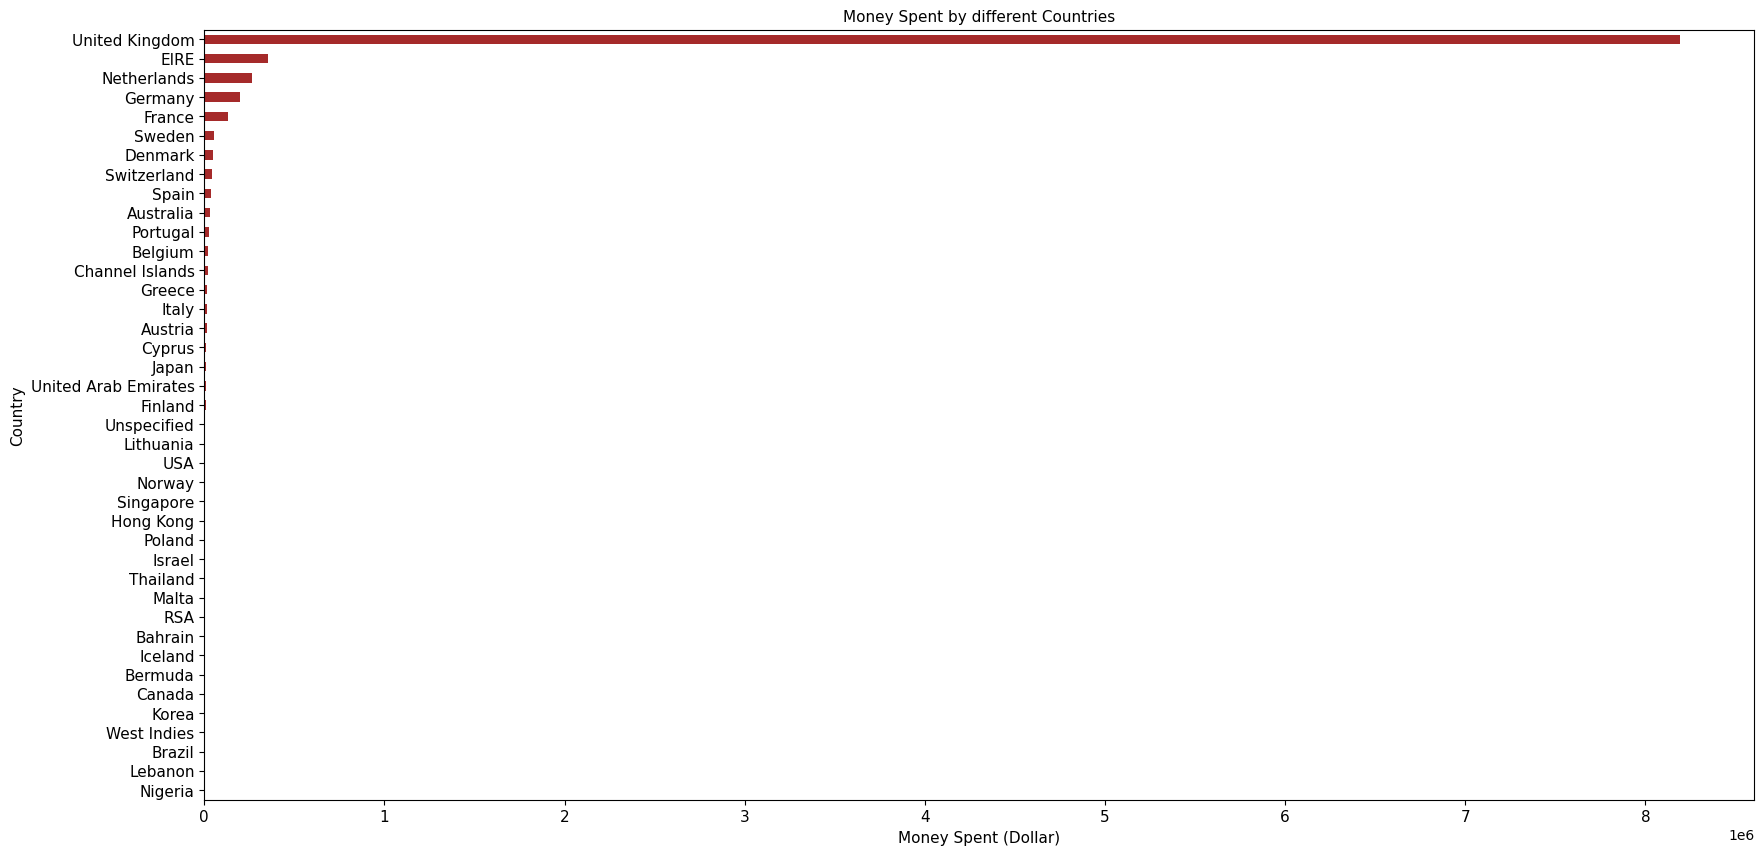

In [45]:
df['Total Amount Spent'] = df['Quantity'] * df['Price']
country_amount_spent = df.groupby('Country')['Total Amount Spent'].sum().sort_values()

plt.subplots(figsize=(20,10))
country_amount_spent.plot(kind = 'barh', fontsize=11,color='#A52A2A')
plt.xlabel('Money Spent (Dollar)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Money Spent by different Countries', fontsize=11)
plt.show()

Birleşik krallık dışındaki ülkelerin, ülke başına harcanan parasını görselleştirilmesi

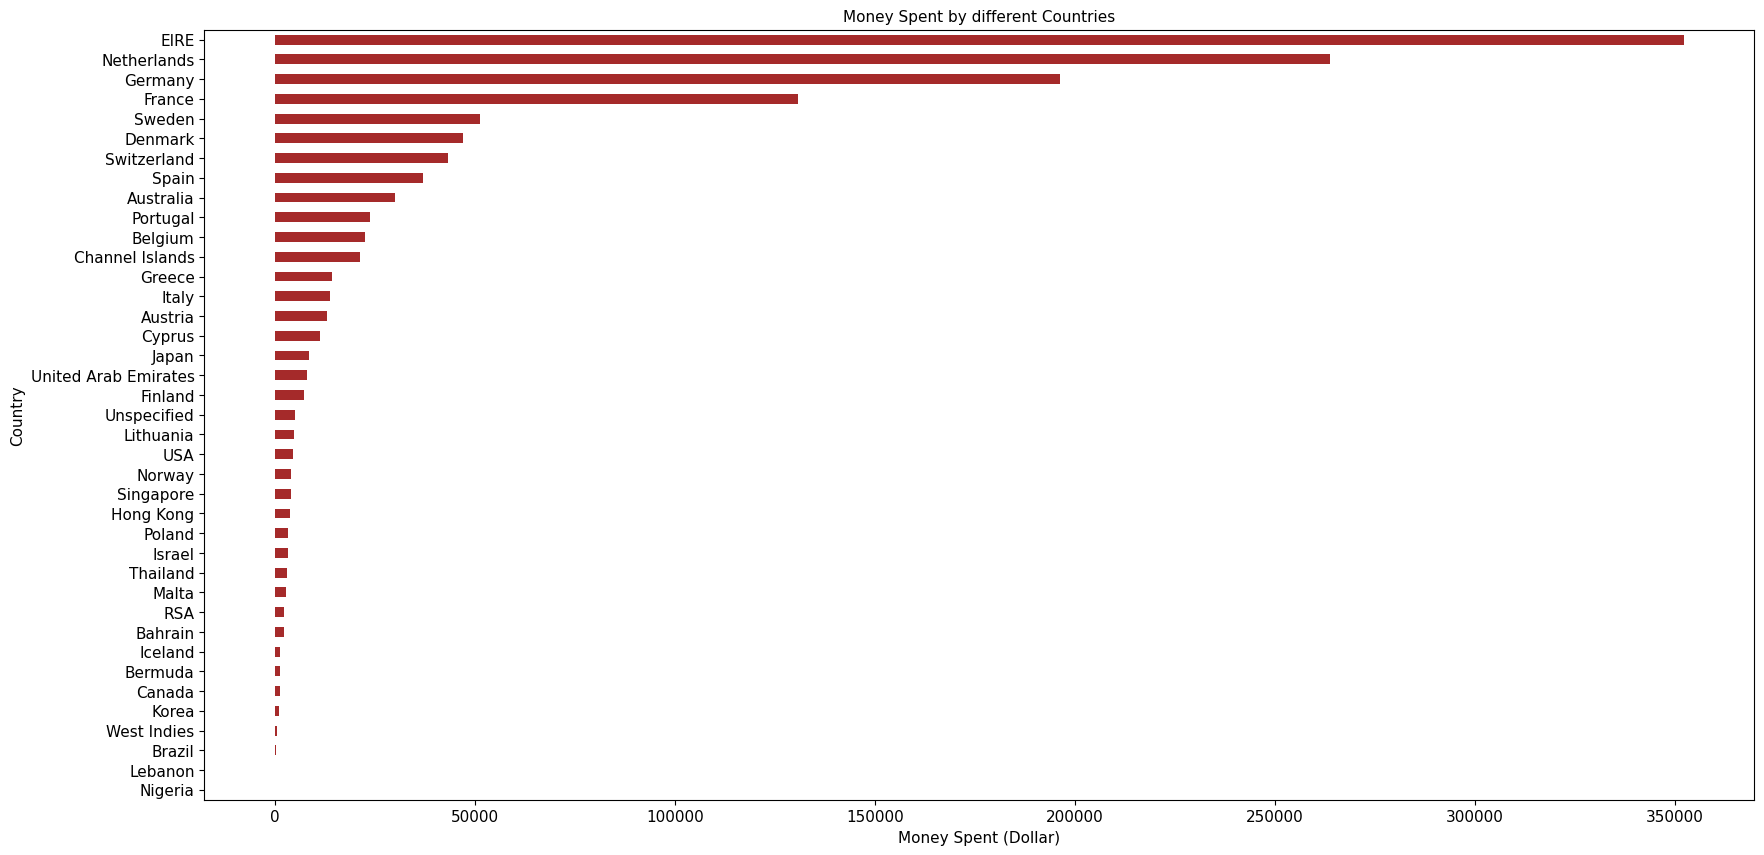

In [46]:
country_amount_spent = df.groupby('Country')['Total Amount Spent'].sum().sort_values()
del country_amount_spent['United Kingdom']

plt.subplots(figsize=(20,10))
country_amount_spent.plot(kind = 'barh', fontsize=11,color='#A52A2A')
plt.xlabel('Money Spent (Dollar)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Money Spent by different Countries', fontsize=11)
plt.show()

In [47]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [48]:

df.dropna(inplace=True)
df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]

replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

df["TotalPrice"] = df["Quantity"] * df["Price"]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
today_date = dt.datetime(2011, 12, 11)

# Lifetime Veri Yapısının Hazırlanması
   ##### recency: Son satın alma üzerinden geçen zaman. Haftalık. (kullanıcı özelinde)
   ##### T: Müşterinin yaşı. Haftalık. (analiz tarihinden ne kadar süre önce ilk satın alma yapılmış)
   ##### frequency: tekrar eden toplam satın alma sayısı (frequency>1)
   ##### monetary: satın alma başına ortalama kazanç

In [49]:
cltv_df = df.groupby('Customer ID').agg(
    {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                     lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
     'Invoice': lambda Invoice: Invoice.nunique(),
     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

cltv_df.columns = cltv_df.columns.droplevel(0)

cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']

cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

cltv_df.describe().T

cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df["recency"] = cltv_df["recency"] / 7

cltv_df["T"] = cltv_df["T"] / 7


BG-NBD Modelinin Kurulması

In [50]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2893 subjects, a: 1.93, alpha: 9.47, b: 6.27, r: 2.22>

1 hafta içinde en çok satın alma beklediğimiz 10 müşteri kimdir?

In [51]:
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

bgf.predict(1,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])

1 ay içinde en çok satın alma beklediğimiz 10 müşteri kimdir?

In [52]:
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()


11.608238398752205

 3 Ayda Tüm Şirketin Beklenen Satış Sayısı Nedir?

In [53]:
bgf.predict(4 * 3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

cltv_df["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

Tahmin Sonuçlarının Değerlendirilmesi

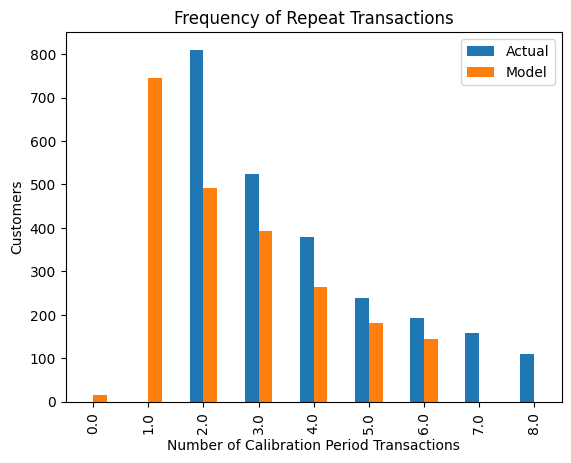

In [54]:
plot_period_transactions(bgf)
plt.show()

GAMMA-GAMMA Modelinin Kurulması

In [55]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).head(10)

ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).sort_values(ascending=False).head(10)

cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])
cltv_df.sort_values("expected_average_profit", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
Customer ID,,,,,,,,
12357.0000,0.0000,55.5714,2,5633.4650,0.0001,0.0003,0.0008,6172.3459
17450.0000,10.0000,62.7143,7,5321.5850,0.0000,0.0000,0.0000,5457.7883
14091.0000,6.2857,99.8571,2,4584.0450,0.0000,0.0002,0.0005,5022.9216
14088.0000,2.0000,60.2857,3,4512.9900,0.0000,0.0001,0.0003,4792.1915
18102.0000,53.2857,105.5714,89,3526.4424,0.0000,0.0000,0.0000,3533.3926
12409.0000,20.5714,80.8571,4,3086.6550,0.0003,0.0014,0.0039,3228.0113
14646.0000,51.7143,105.4286,78,3108.7672,0.0000,0.0000,0.0000,3115.7658
12454.0000,3.5714,60.2857,4,2811.4450,0.0000,0.0000,0.0001,2940.2847
16684.0000,50.2857,104.7143,27,2847.7670,0.0000,0.0000,0.0000,2866.3781


BG-NBD ve GG modeli ile CLTV'nin hesaplanması.

In [56]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=3,  # 3 aylık
                                   freq="W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)

cltv.head()

cltv = cltv.reset_index()

cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
cltv_final.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
67,12497.0000,34.8571,92.1429,2,2563.8200,0.0042,0.0166,0.0480,2810.1798,142.8872
1671,15823.0000,51.1429,104.5714,3,1292.0500,0.0062,0.0245,0.0709,1372.9255,103.1798
83,12557.0000,50.1429,103.2857,4,1681.2950,0.0046,0.0180,0.0520,1758.7351,96.9996
1059,14564.0000,42.8571,105.1429,2,1302.8100,0.0044,0.0175,0.0508,1429.0021,76.9371
6,12358.0000,50.8571,104.5714,3,901.2367,0.0061,0.0240,0.0694,958.0482,70.4795
449,13373.0000,45.2857,104.8571,3,1424.9800,0.0038,0.0150,0.0435,1514.0405,69.8940
58,12477.0000,31.8571,89.1429,3,2352.2100,0.0023,0.0090,0.0260,2498.3637,68.8879
2127,16732.0000,46.8571,104.5714,3,1175.2767,0.0044,0.0175,0.0505,1248.9619,66.8987
42,12435.0000,48.5714,105.4286,4,1460.2225,0.0035,0.0136,0.0393,1527.6081,63.6585
221,12873.0000,40.5714,97.4286,2,826.6500,0.0052,0.0205,0.0595,907.4665,57.2302


CLTV'ye Göre Segmentlerin Oluşturulması

In [57]:
cltv_final

cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

cltv_final.sort_values(by="clv", ascending=False).head(50)

cltv_final.groupby("segment").agg(
    {"count", "mean", "sum"})

Customer ID                          recency                        T                    frequency               monetary                      expected_purc_1_week               expected_purc_1_month               expected_purc_3_month                expected_average_profit                        clv                   
              count           sum       mean   count        sum    mean count        sum    mean     count   sum    mean    count         sum     mean                count    sum   mean                 count    sum   mean                 count     sum   mean                   count         sum     mean count        sum    mean
segment                                                                                                                                                                                                                                                                                                                                 
D               724 11226870.0000 15506.7265     724 16447.1429 22.7170   724 63682.5714 87.9594       724  8403 11.6064      724 236682.9841 326.9102                  724 0.0252 0.0000                   724 0.0991 0.0001                   724  0.2832 0.0004                     724 244735.4256 338.0324   724    59.2836  0.0819
C               723 11080156.0000 15325.2503     723 16888.7143 23.3592   723 61453.0000 84.9972       723  3681  5.0913      723 241095.7126 333.4657                  723 0.1993 0.0003                   723 0.7830 0.0011                   723  2.2435 0.0031                     723 254348.7239 351.7963   723   572.9409  0.7924
B               723 11097464.0000 15349.1895     723 21845.1429 30.2146   723 64960.4286 89.8484       723  3195  4.4191      723 266124.8549 368.0842                  723 0.6958 0.0010                   723 2.7373 0.0038                   723  7.8671 0.0109                     723 281376.0014 389.1784   723  2264.3624  3.1319
A               723 11005511.0000 15222.0069     723 27362.1429 37.8453   723 68931.4286 95.3408       723  2515  3.4786      723 338615.1853 468.3474                  723 2.0273 0.0028                   723 7.9888 0.0110                   723 23.0563 0.0319                     723 360241.1576 498.2589   723 10412.1718 14.4013

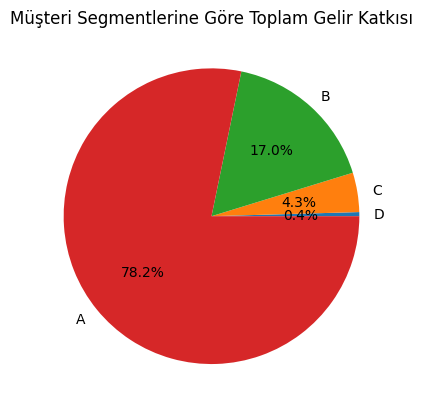

In [58]:
segment_sums = cltv_final.groupby('segment')['clv'].sum()
segment_sums.plot(kind='pie', autopct='%1.1f%%')
plt.title('Müşteri Segmentlerine Göre Toplam Gelir Katkısı')
plt.ylabel('')
plt.show()

In [59]:
def create_cltv_p(dataframe, month=3):
    # Veri Ön İşleme
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    today_date = dt.datetime(2011, 12, 11)

    cltv_df = dataframe.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                         lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
         'Invoice': lambda Invoice: Invoice.nunique(),
         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    cltv_df.columns = cltv_df.columns.droplevel(0)
    cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
    cltv_df["recency"] = cltv_df["recency"] / 7
    cltv_df["T"] = cltv_df["T"] / 7

    # BG-NBD Modelinin Kurulması
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])

    cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                                  cltv_df['frequency'],
                                                  cltv_df['recency'],
                                                  cltv_df['T'])

    cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    cltv_df["expected_purc_3_month"] = bgf.predict(12,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    # GAMMA-GAMMA Modelinin Kurulması
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'], cltv_df['monetary'])
    cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                                 cltv_df['monetary'])

    # BG-NBD ve GG modeli ile CLTV'nin hesaplanması.
    cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time=month,  # 3 aylık
                                       freq="W",  # T'nin frekans bilgisi.
                                       discount_rate=0.01)

    cltv = cltv.reset_index()
    cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
    cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

    return cltv_final

In [60]:
cltv_final2 = create_cltv_p(df_)

In [61]:
cltv_final2.to_csv("cltv_prediction.xlsx", index=False)


In [62]:
 
df_final = pd.read_excel("C:/Users/caspe/OneDrive/Masaüstü/online_retail_II-.xlsx")


In [63]:
df_final

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.9500,17530.0000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.7500,17530.0000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.7500,17530.0000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.7500,17530.0000,United Kingdom
